# PCA Lab

In this lab we will be practicing using PCA to analyze a genomic dataset. 

For all the following steps, you can write code into a bash file and run using sbatch or you can start an interactive job on the hpcc and run line by line. See [here](https://docs.icer.msu.edu/Interactive_Job/) for info about interactive jobs. What worked for me was asking for 2 nodes, 4 cores, and 1GB of memory per cpu.


## The data

*Arabidopsis thaliana*. This data was downloaded from [The 1001 Genomes Project](https://1001genomes.org/data/GMI-MPI/releases/v3.1) and the file is called `1001genomes_snp-short-indel_only_ACGTN.vcf.gz` and is in the '/mnt/research/PLB812_FS24_S001/12_PCA' folder.

## Making plots
You will need some extra information about the genotypes in your PCA.

This file is called `accessions.csv`.

There is a file called 'pca-plots.Rmd' in the class folder ('/mnt/research/PLB812_FS24_S001/12_PCA') that has code for making PCA plots. Please open it up in Rstudio using ondemand, edit the paths for your own data, and make PCA plots for all the SNPs and then for PCAs made from each subset.

When you're done, put the PCA plots in this notebook.

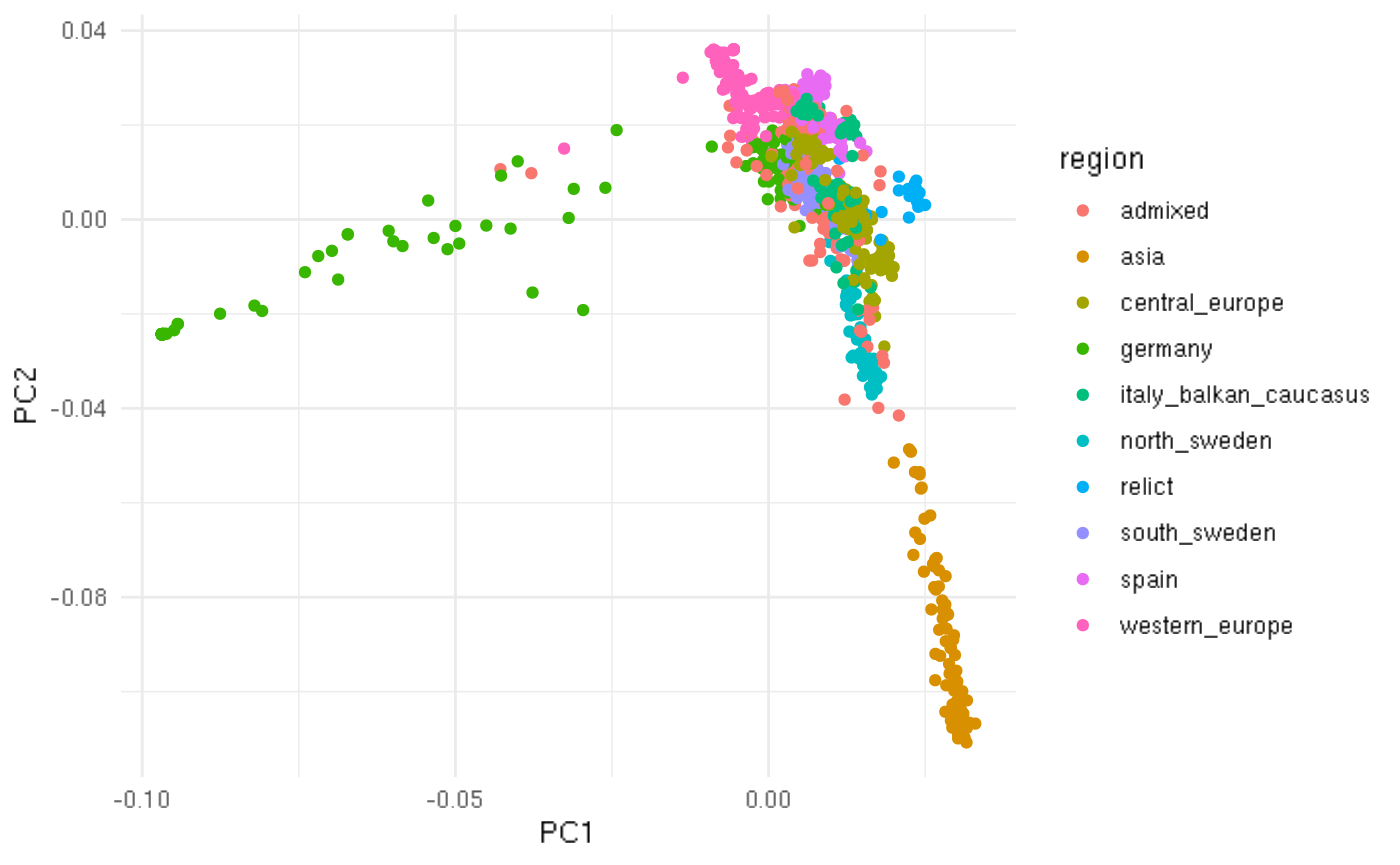

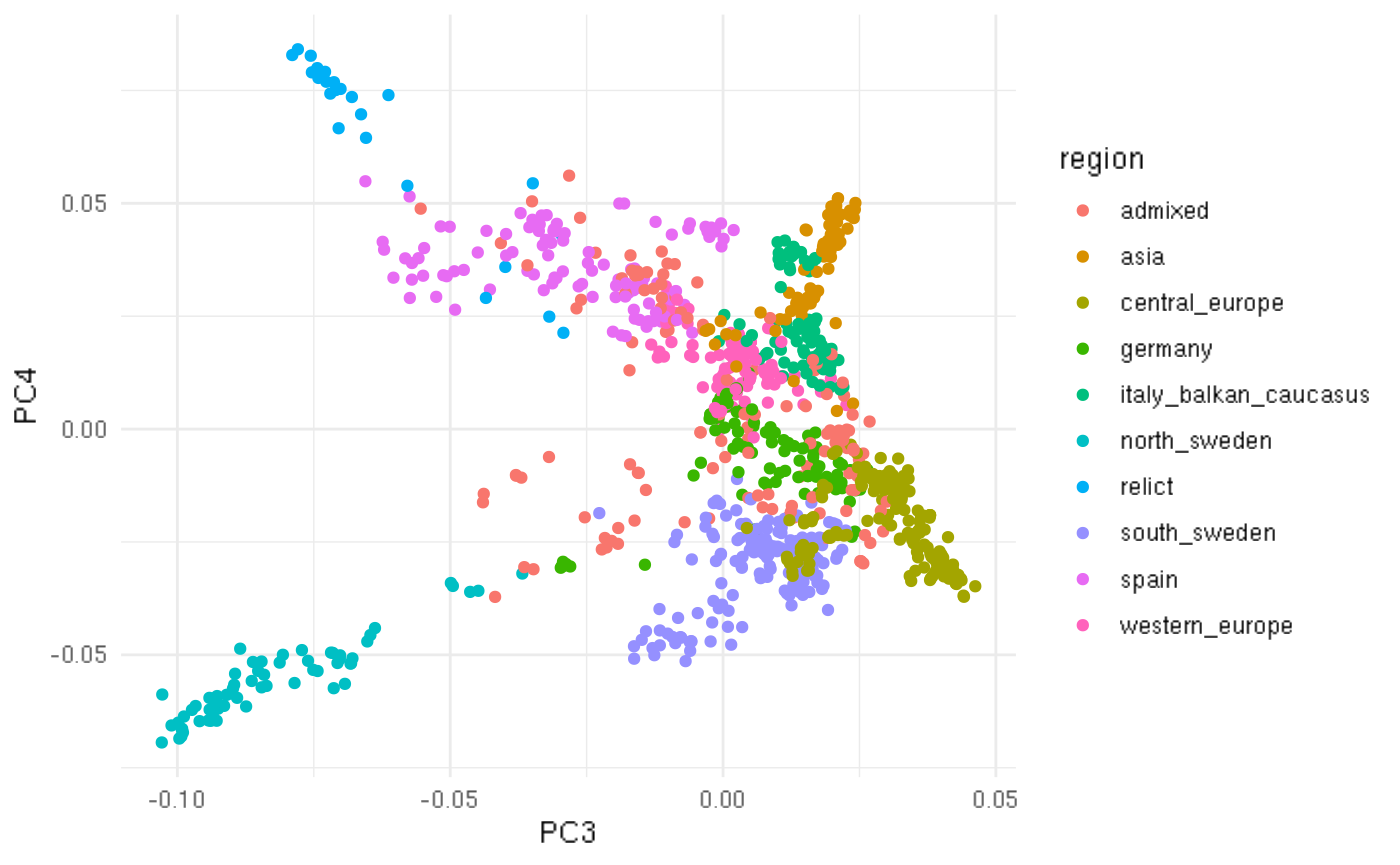

## Running PCA 

We will be using the software Plink to run PCA. Our first step will be loading the Plink module on the hpcc.

`$module purge` <br>
`$module load PLINK/2.00a3.7-gfbf-2023a`

Next, if your data is in a vcf file, you need to convert it to a plink format.  We will also want to filter these files to give us SNPs that are not in linkage disequilibrium with each other, and to remove rare sites or sites with a lot of missing data. You can look up each of the options in the following command to see how they work.

`$plink2 --vcf 1001genomes_snp-short-indel_only_ACGTN.vcf.gz --set-all-var-ids @:# --indep-pairwise 100 5 0.2 --geno 0.05 --max-alleles 2 --maf 0.05 --allow-extra-chr --make-bed --out arabidopsis`

If you were to do this another time and your data wass already in a plink format (file names end with **.bed** and **.bim** and **.fam** and have the same file prefix), you could run the following command:

`$plink2 -bfile [file-prefix] --indep-pairwise 100 20 0.2 --geno 0.05 --max-alleles 2 --maf 0.05 --allow-extra-chr --make-bed --out [file-prefix].filtered`

Once you have filtered your plink files of SNPs, it is time to run the PCA analysis! The command is below. If you used the command above to conver the Arabidopsis vcf to pca format, replace [file-prefix] with arabidopsis.

`$plink2 -bfile [file-prefix] --extract [file-prefix].prune.in --pca --allow-extra-chr --out [file-prefix]-pca`

Note the `--extract` flag here directs you towards a list of sites that was generated in the previous filtered set. If you were to skip this, plink would try to run the PCA on all the sites, not just the sites that passed the filters. 

You can use **less** to look at the output files from this step, which will be `[file-prefix]-pca.eigenvec` and `[file-prefix]-pca.eigenval`.


Example of running a PCA:


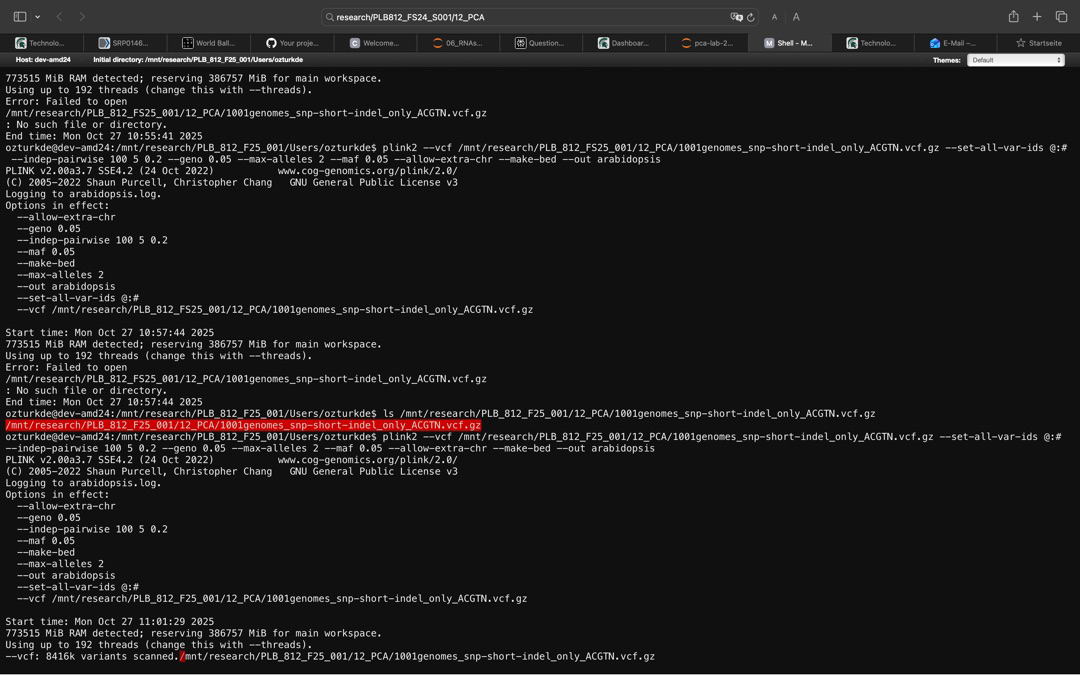

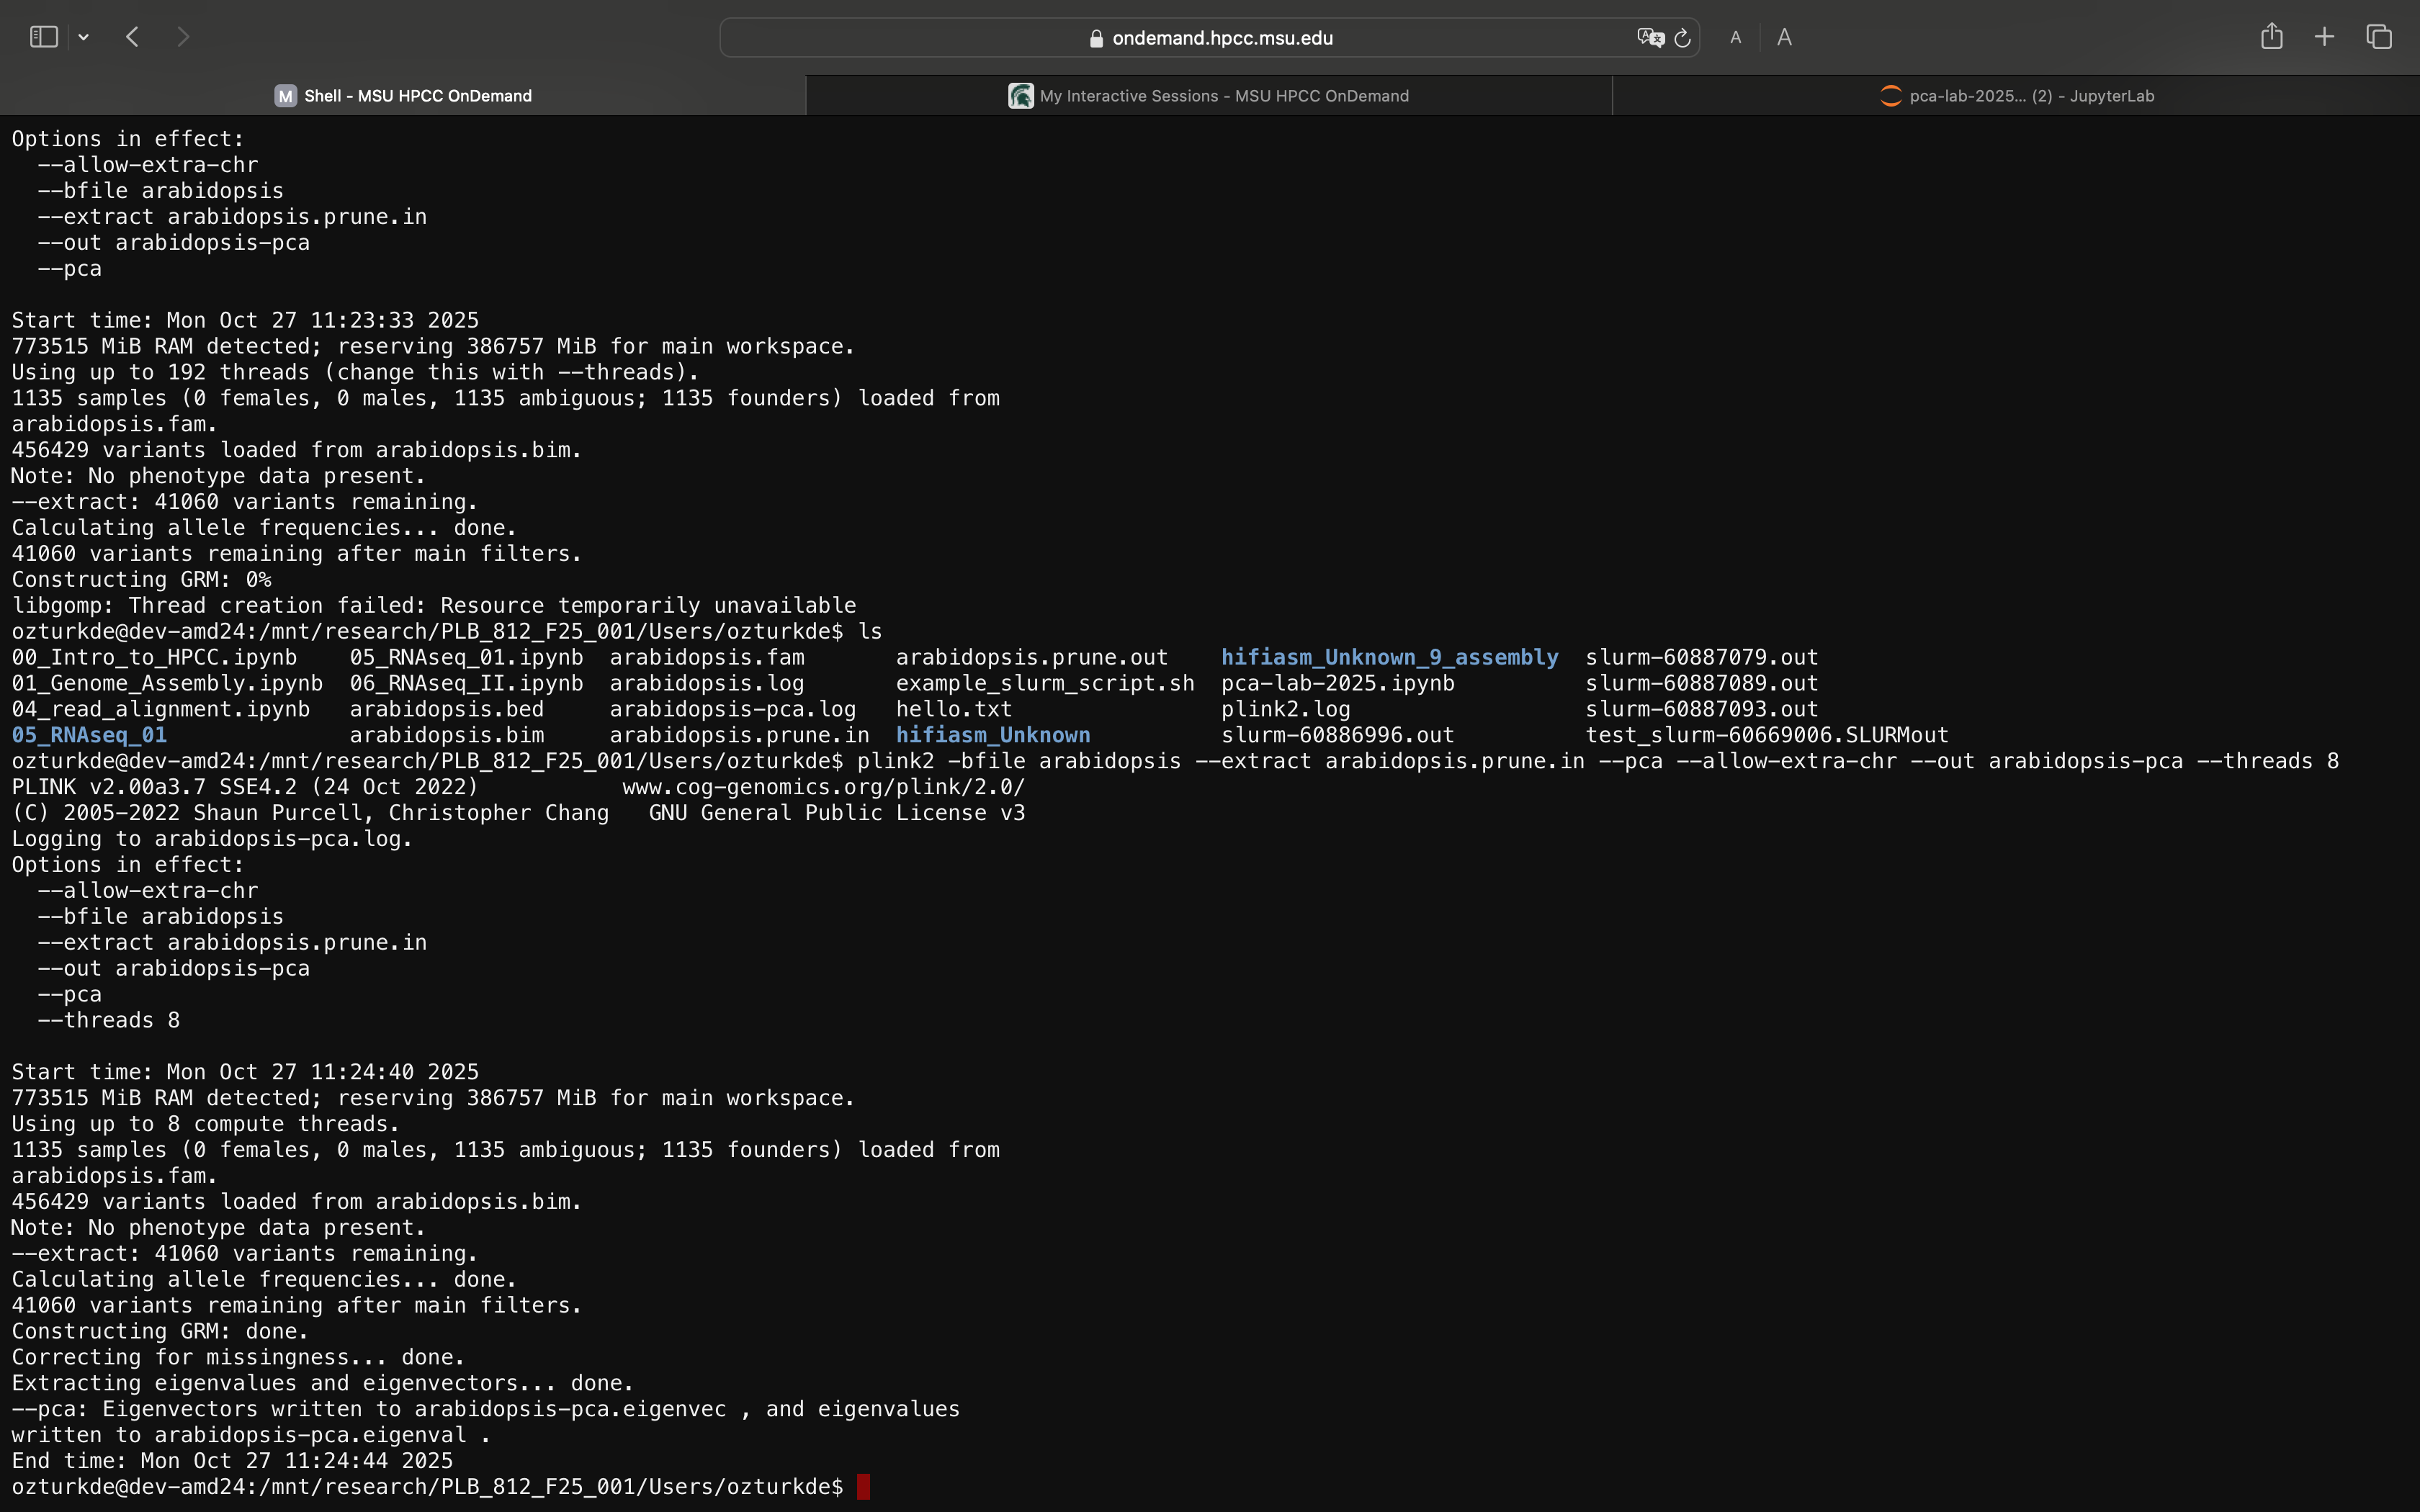

## Lab option 1: Subsampling SNPs

We talked in class about how the number of SNPs is important for making a PCA. In the lab we'll investigate this using the *A. thaliana* data.

We can efficiently subsample a smaller dataset by sampling from the [file-prefix].filtered.in site, and then only using these sites when we run the PCA. To subsample 100 sites, use the following bash command:

`shuf [file-prefix].filtered.in | head -n 100 > [file-prefix].100.in`

shuf arabidopsis.prune.in | head -n 100 > arabidopsis.100.in
shuf arabidopsis.prune.in | head -n 1000 > arabidopsis.1000.in

'plink2 -bfile arabidopsis --extract arabidopsis.100.in --pca --allow-extra-chr --out arabidopsis.100-pca'
plink2 -bfile arabidopsis --extract arabidopsis.1000.in --pca --allow-extra-chr --out arabidopsis.1000-pca
plink2 -bfile arabidopsis --extract arabidopsis.10,000.in --pca --allow-extra-chr --out arabidopsis.10,000-pca


Take a second to look at this command and think about what the different parts of it do (or ask a neighbor or Emily!).
Modify the command to take subsamples of 100, 1000, and 10,000 sites.

You can count the number of lines in your `[file-prefix].x.in` files using `wc -l [file]` ('wc -l arabidopsis.100.in'). Use this to check that your subsampling worked correctly. Then, rerun your PCA on these subsamples.

wc -l arabidopsis.100.in
wc -l arabidopsis.1000.in
wc -l arabidopsis.10,000.in

Exemplary subsample for 1000:
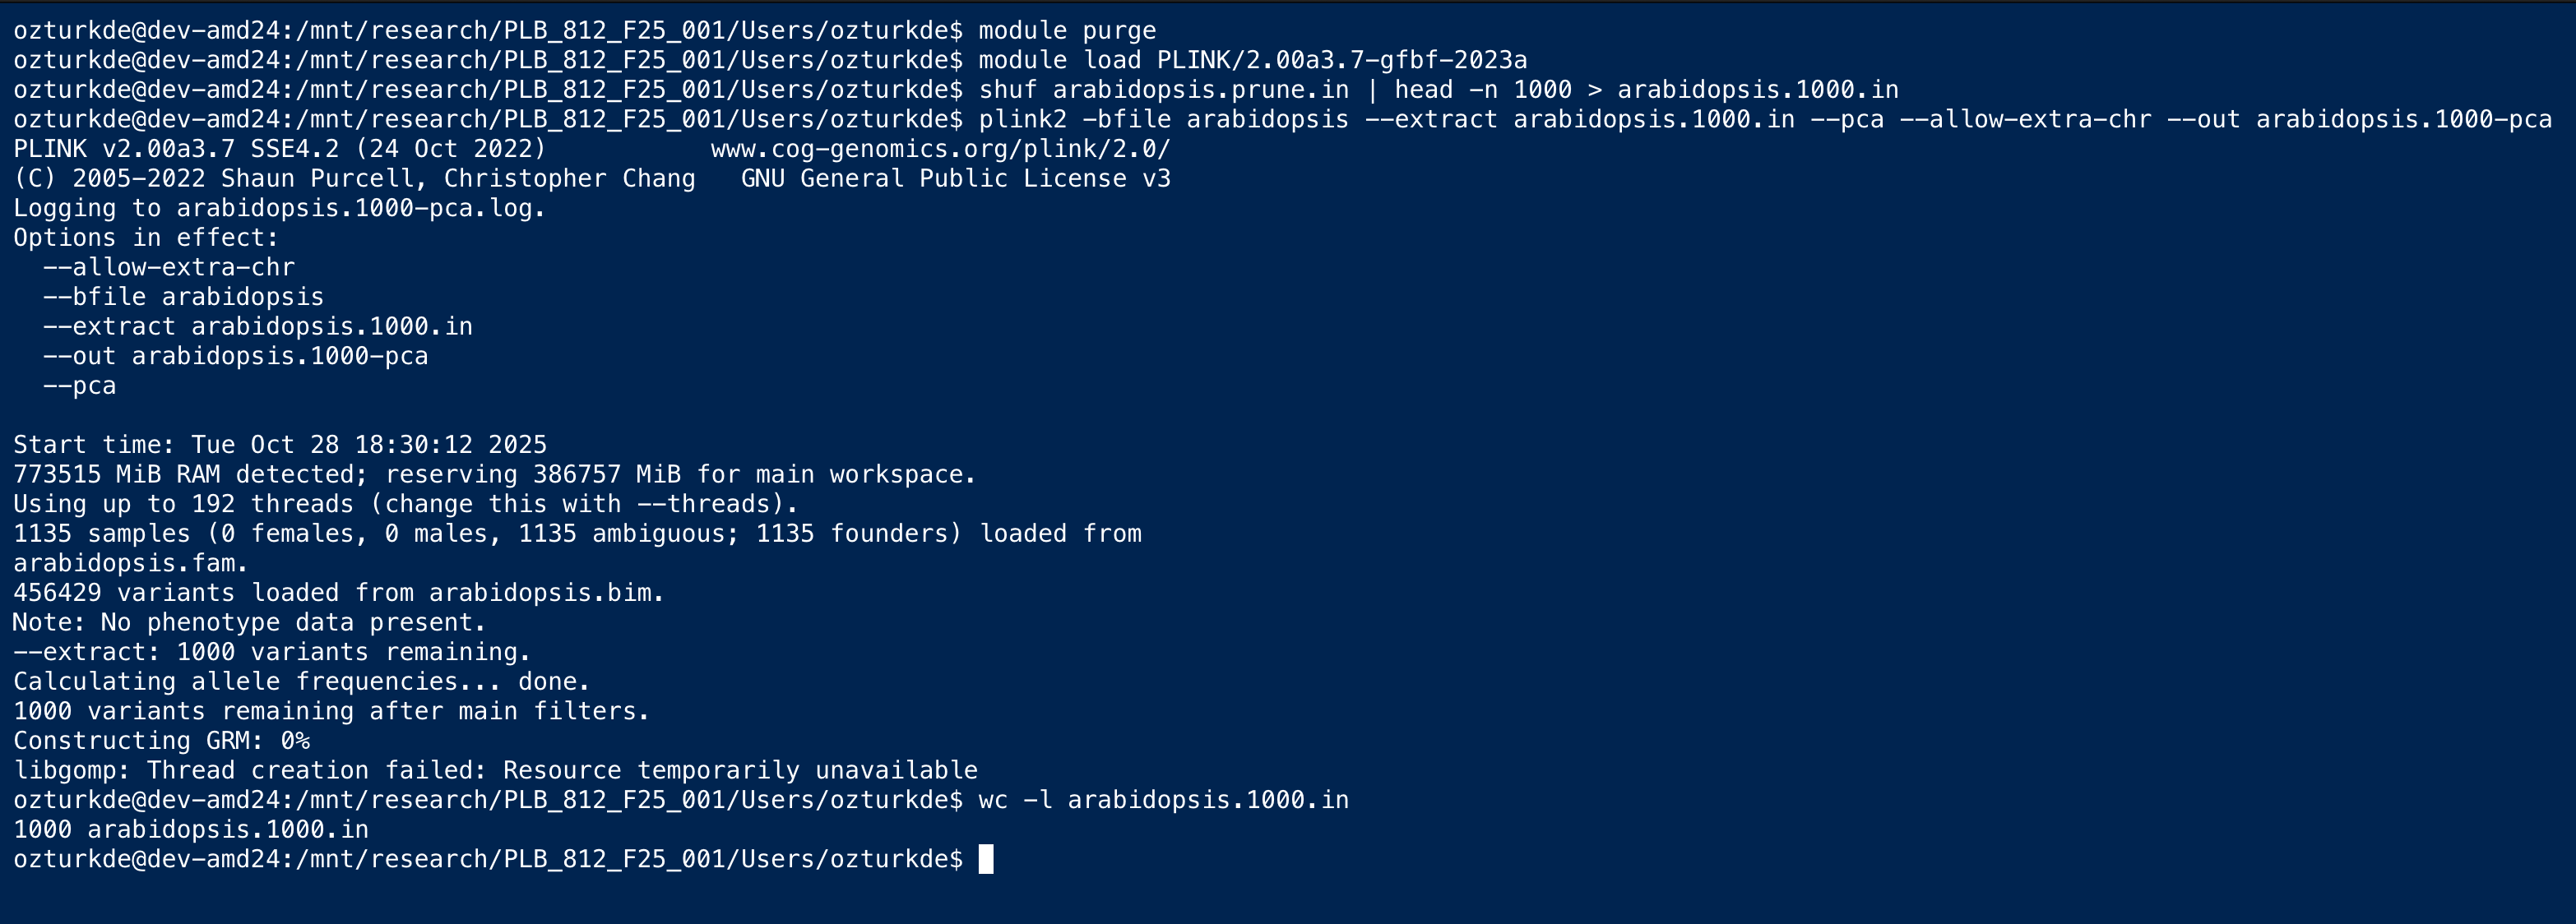

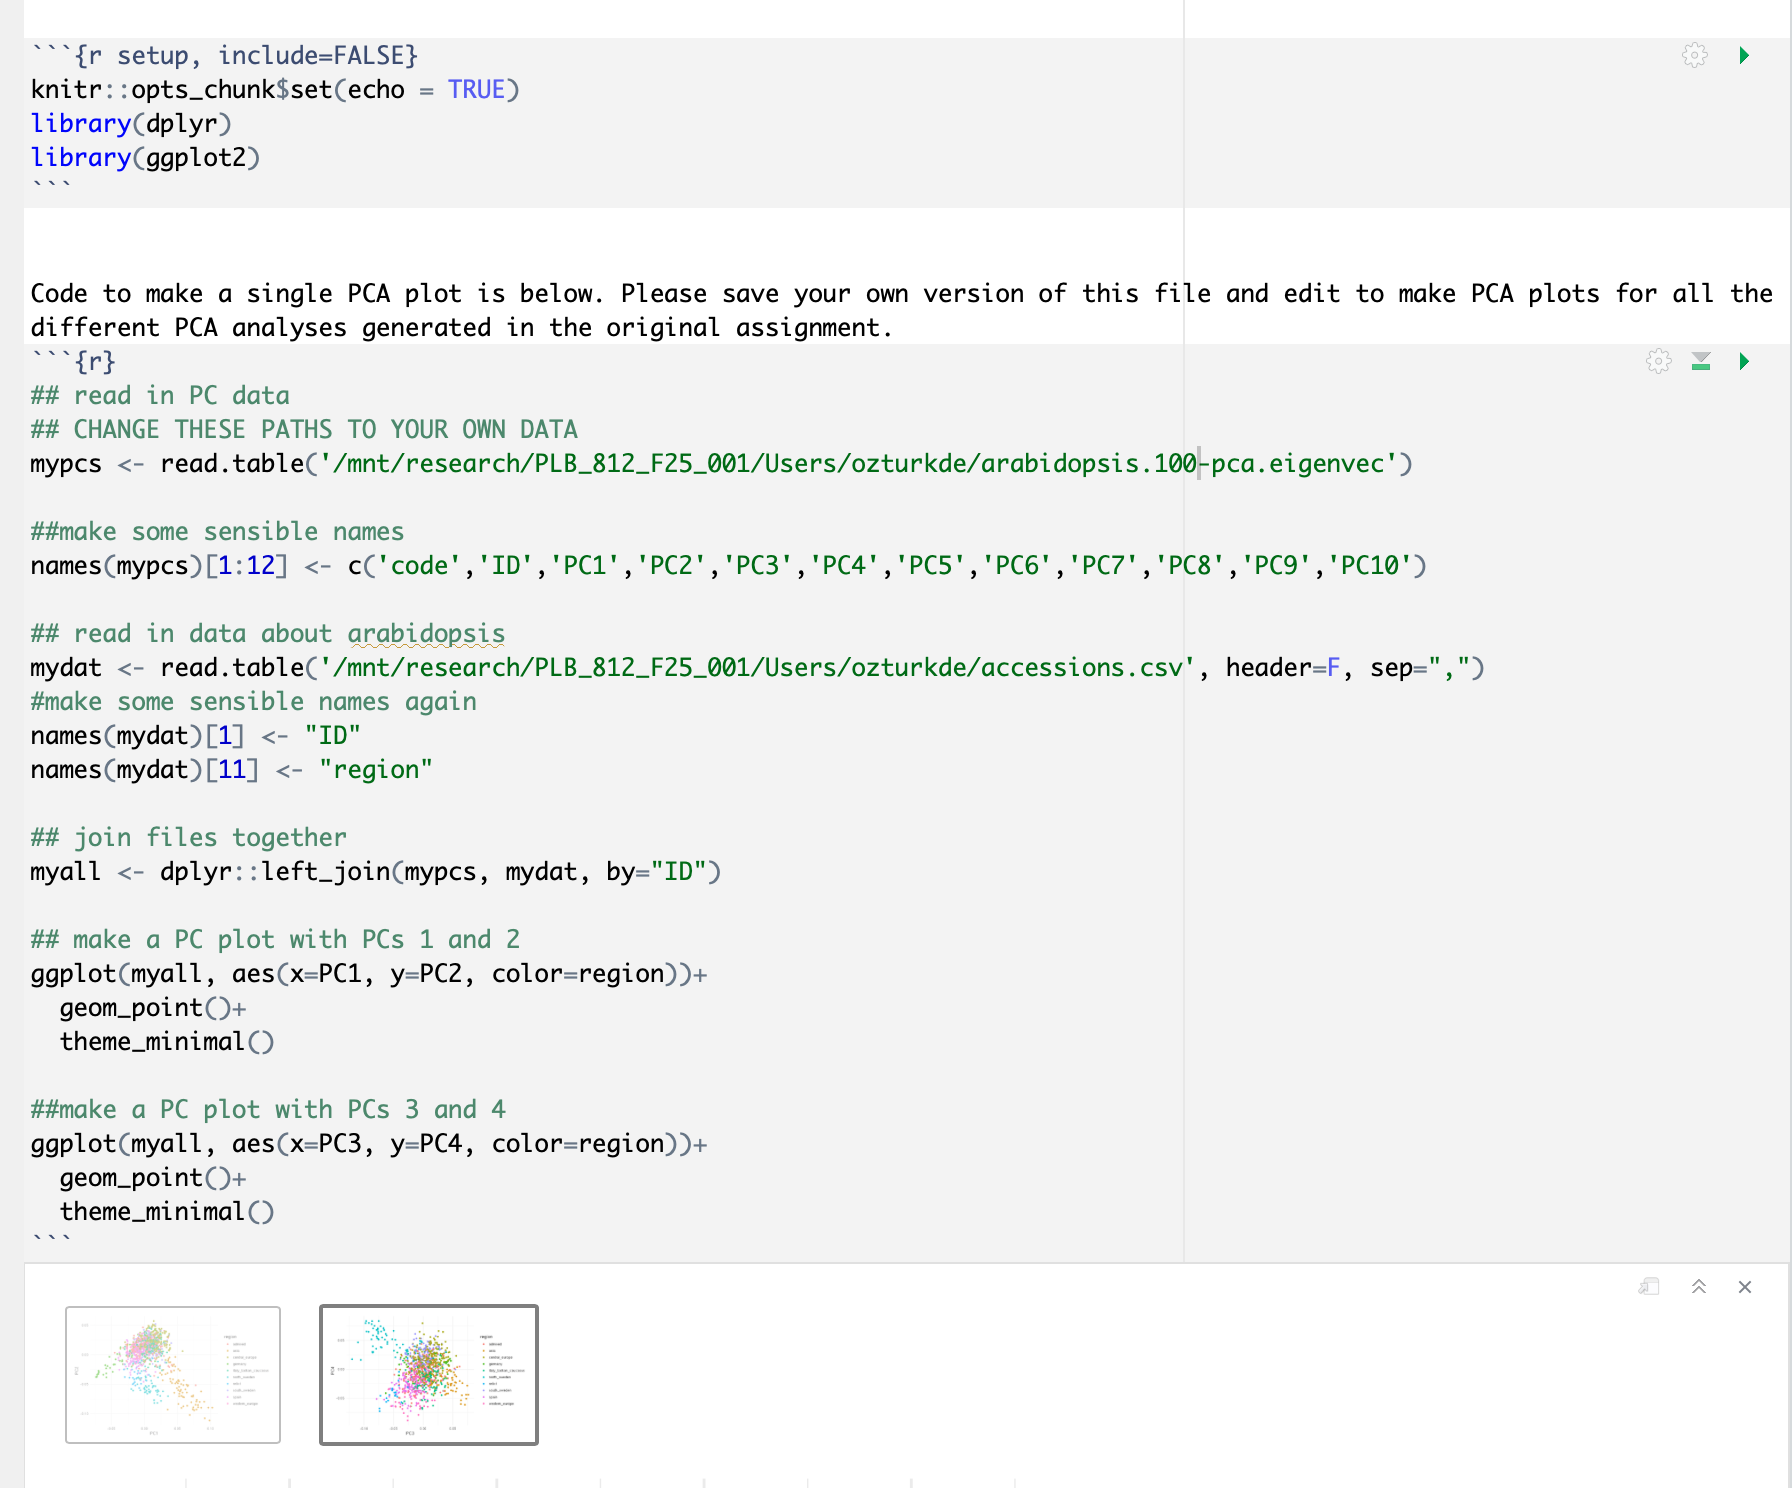

### Questions

1. Based on the plot you've made, what are the major axes of variation in your diversity dataset? How do you know this?

2. How many sites were in the dataset of all SNPs that you used to calculate the PCA without subsampling? How did you find this out?

3. How did changing the number of SNPs affect the PCA plots you made? How many SNPs would you recommend that another researcher use for Arabidopsis PCA?

Answers:

1. The major axes of variation in the Arabidopsis diversity dataset represent distinct patterns of genetic differentiation shaped by geography and demographic history. PC1, explaining the largest proportion of genetic variance, captures the extreme genetic isolation of German accessions, which form a tight cluster positioned far to the left of the plot while all other populations cluster toward the center and right. This dramatic separation likely reflects a unique evolutionary event in the German population, such as a severe founding bottleneck or long-term persistence in a glacial refugium that resulted in substantial genetic drift and differentiation from other European lineages. The compactness of the German cluster compared to the broader spread of other groups further suggests reduced genetic diversity within Germany, consistent with founder effects or prolonged isolation.
PC2, the second-largest source of variation, captures a clear geographic gradient running from southeast to northwest. Asian accessions extend into strongly negative PC2 values at the bottom of the plot, Western European and Scandinavian populations occupy positive PC2 space at the top, and Caucasus and Central European populations fall intermediately along this axis. This gradient pattern indicates that geographic distance has constrained gene flow and driven population divergence, likely reflecting a historical colonization route where Arabidopsis spread from an Asian or Caucasus origin westward into Europe. The continuous nature of this gradient rather than discrete clusters suggests isolation by distance, where populations accumulate genetic differences proportional to geographic separation.
PC3 and PC4 capture finer-scale regional variation within the broader continental structure. PC3 primarily separates North Swedish accessions, which extend far to the left into negative PC3 space, from Asian and Central European populations on the right, while relict populations occupy intermediate positions. PC4 distinguishes relict populations, which appear in the upper left with strongly positive PC4 values, from the majority of other European groups. Relict populations represent ancient lineages that survived in southern European refugia during ice ages, maintaining unique ancestral genetic variation that differs from populations that recolonized northern areas after glacial retreat. The isolation of North Swedish accessions likely reflects their position at the extreme northern range limit, where they may have experienced founder effects during post-glacial colonization or unique selection pressures in harsh northern environments. These higher-order components reveal substructure related to glacial history and recent range expansions that occurred after the major continental divergence captured by PC1 and PC2.
I know these are the major axes of variation through several lines of evidence. First, the clustering patterns are non-random and correspond directly to known geographic origins, with populations from the same region grouping together in PC space. Second, the magnitude of separation between clusters reflects genetic distance, where the greatest separations occur between the most geographically distant populations such as Germany and Asia. Third, the spread of points along PC1 and PC2 is much greater than along PC3 and PC4, indicating the first two axes explain substantially more variance and capture the dominant population structure. Fourth, the continuous gradient visible along PC2 from Asia through the Caucasus into Europe demonstrates that geographic structure is a primary driver of genetic differentiation. Finally, the emergence of specific regional populations like relicts and North Swedish accessions only in higher-order components confirms that PC3 and PC4 reveal secondary patterns after the major demographic events have been accounted for.

2. To determine how many SNP sites were used for the PCA without subsampling, I checked the output from my initial PLINK filtering and LD-pruning steps. According to the PLINK log and terminal output, after applying quality filters and LD-pruning, 41,060 variants remained in the dataset (as indicated by the line “extract: 41060 variants remaining after main filters” in my session output). This means that my main PCA, before any additional random subsampling of SNPs, was performed using exactly 41,060 SNP sites. I verified this by looking at both the terminal output and the number of lines in my filtered SNP file (“arabidopsis.prune.in”), ensuring that this was the input for the PCA analysis. This method provides an accurate count of all SNPs actually included in my full-data PCA.

3. Comparing my PCA results using the full filtered dataset (41,060 SNPs) to those using only 100 randomly subsampled SNPs reveals substantial differences in the clarity and reliability of population structure detection. In the full dataset PCA, distinct geographic clusters are clearly visible with minimal overlap. German accessions form a tight, well-separated cluster on the left side of the PC1 axis, Asian accessions extend downward along PC2 with clear differentiation, and European regional groups show organized intermediate positioning that reflects geographic gradients. The higher-order components PC3 and PC4 successfully isolate fine-scale regional patterns such as the distinct positioning of North Swedish and relict populations, indicating that the full SNP set captures both major continental structure and subtle within-continent variation.
In contrast, the PCA based on only 100 SNPs shows dramatically reduced resolution and increased noise. While some weak clustering tendency remains for Germany and Asia, the boundaries between populations are blurred with extensive overlap in the center of the plot. Many regional groups that were distinct in the full analysis now merge together, making it difficult to confidently assign accessions to specific geographic origins. The PC3 versus PC4 plot with 100 SNPs shows almost complete loss of fine-scale structure, with North Swedish and relict populations no longer forming recognizable clusters and instead appearing scattered among other groups. This demonstrates that 100 SNPs provide insufficient genetic information to reliably detect population structure, as random sampling variation and noise overwhelm the true genetic signal.
The dramatic loss of resolution when using only 100 SNPs indicates that population genomic studies require a minimum threshold of markers to achieve stable and interpretable results.

Note: I attempted to generate PCA results using intermediate subsampling levels of 1,000 and 10,000 SNPs to better characterize the transition from noisy to stable population structure patterns. However, I encountered thread creation errors during these analyses that prevented successful completion of the eigenvector calculations for these datasets. Despite this technical limitation, the comparison between 100 SNPs and the full 41,060 SNP dataset clearly demonstrates the importance of using adequate marker density for population genomic inference. I would recommend that researchers conducting Arabidopsis PCA use at least 1,000 to 10,000 LD-pruned SNPs for robust population structure analysis. This range provides sufficient genome-wide coverage to capture major demographic patterns while maintaining computational efficiency. Using fewer than 1,000 SNPs risks producing unreliable or unstable results that may vary substantially depending on which random subset of markers is selected.

Plots for 100 subsampled sites:
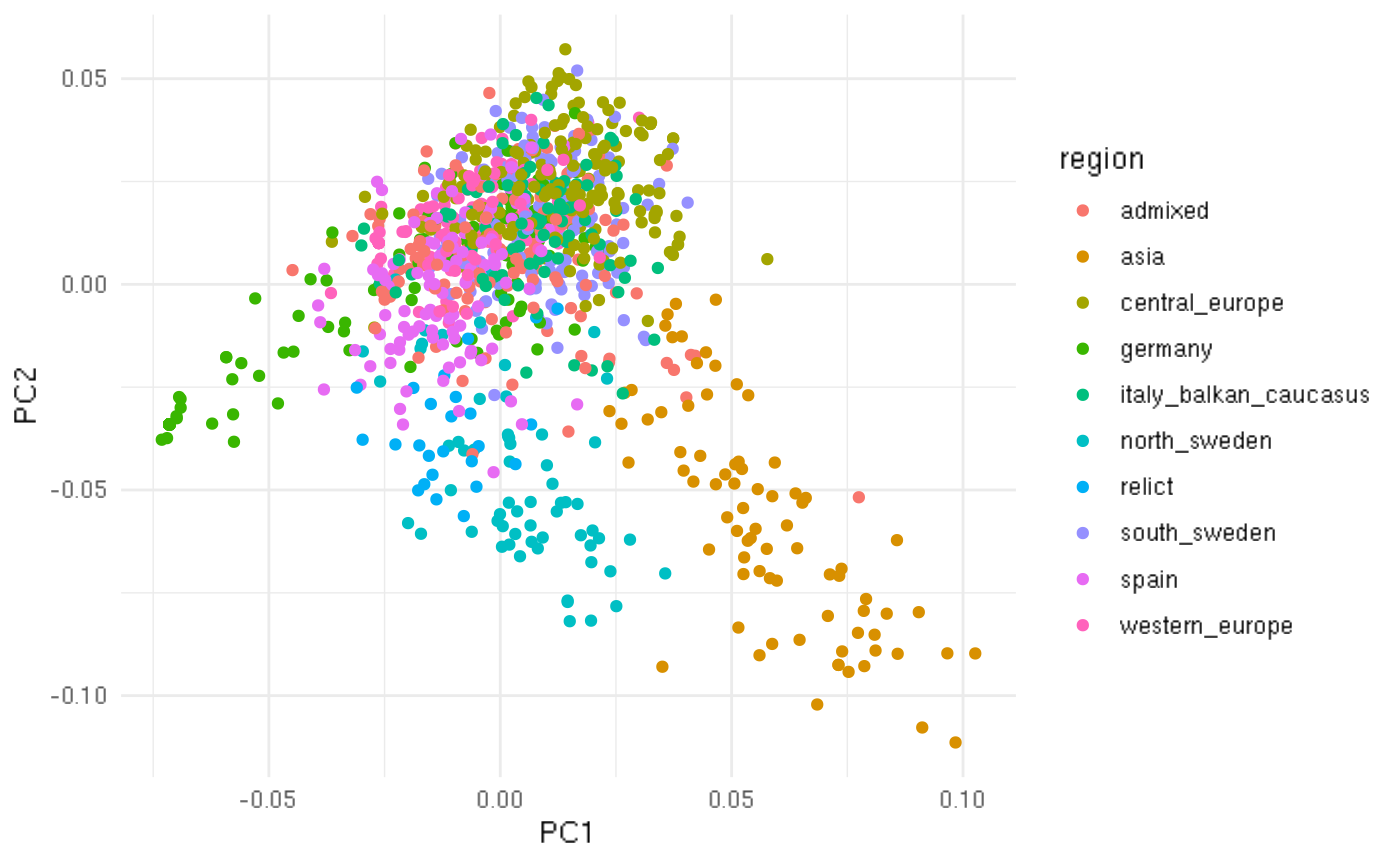
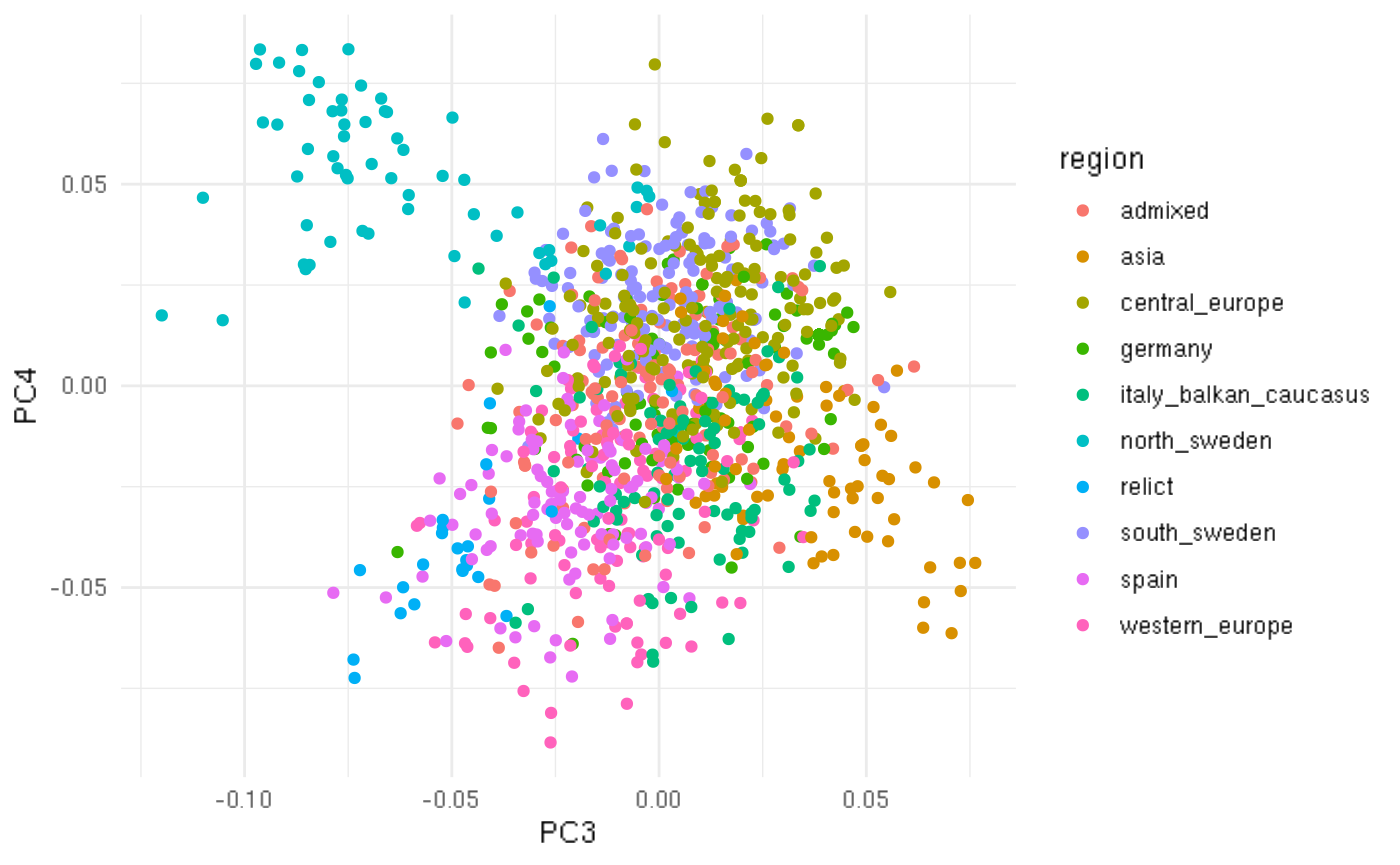

Plots for 1000 subsampled sites:


Plots for 10,000 subsampled sites:

## Lab Option 2: Other species

You may be interested in testing out PCA on some other species. James Whiting, Sam Yeaman and colleagues assembled a great repository of vcfs for a variety of plant species [here](https://datadryad.org/dataset/doi:10.5061/dryad.15dv41p57#readme). 

For this option, pick a species and transfer the vcf file to the hpcc. Then use the steps from above to convert the vcf to plink format and calculate the pcs. Use the R script to make a figure. Check the repository to see if there's extra information you can add to your figure. When you're done, add the figure to this notebook.

### Questions
1. Based on the plot that you've made, what are the major axes of variation in your diversity dataset? How do you know this?

## Other helpful stuff:

[The Documentation for Plink2](https://www.cog-genomics.org/plink/2.0/)

[A tutorial on PCA using Plink](https://www.zoology.ubc.ca/~schluter/R/Genomics.html#PCA_with_PLINK2)